<h2><strong>Predictive Modeling of Health Insurance Charges: Understanding the factors influencing costs</strong></h2>

<img style="width: 1000px; height: 500px; border: 1px solid #ccc;" src="images/IMG_0597.JPG"></image>

Lets start by load this data into a Pandas DataFrame. This will enable us to explore the data through filtering, selecting new colums and creating new columns.


First, let's take a look at the available columns:
   - `age` Age of primary beneficiary.
   - `sex` Insurance contractor gender, female / male.
   - `bmi` Body mass index, providing an understanding of body of principal beneficiary.
   - `childeren` Number of children covered by health insurance / Number of dependents
   - `smoker` smoker / non - smoker.
   - `region` stores the beneficiary's residential area in the US, northeast, southeast, southwest, northwest..
   - `charges` stores the estimated medical insurance costs for the individuals.
   

In [2]:
#Import....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [3]:
df = pd.read_csv('insurance[1].csv')

In [4]:
#Glimpse of the data
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Last five rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#Check for unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
# Checking for duplicate values
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [8]:
# Droping duplicate values
df.drop_duplicates(inplace=True)

In [9]:
#row*cols
df.size

9359

In [10]:
df.shape

(1337, 7)

<h5> Data Cleaning</h5>

Check for missing and dplicate values to ensure we are ready to explore!

In [11]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
#Checking data types and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<h3>Summary and Distribution of Numerical Variables</h3>
Lets start by creating a function statistically summarize the numerical variable.This function will also spin up a few plots to visually describe the variable

In [14]:
# Helper Functions

def summary(x):
    x_min = min(df[x])
    x_max = max(df[x])

    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.50)
    q3 = df[x].quantile(0.75)

    print(f"Variable is {x}")
    print(f"Min value: {x_min}")
    print(f"Max value: {x_max}")
    print(f"Q1 -> {q1} Q2 -> {q2} Q3 -> {q3}")



    # Define figure object
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    sns.set_style("whitegrid")
    fig.subplots_adjust(hspace=0.6)
    sns.set_palette('pastel')

    # Density Distribution Plot
    sns.histplot(x=df[x], color='r', ax=axes[0, 0])
    axes[0, 0].set_title(f"{x.capitalize()} Density Distribution")

    # Violin Plot
    sns.violinplot(x=x, data=df, ax=axes[0, 1], legend=False)
    axes[0, 1].set_title(f"{x.capitalize()} Violin Plot")

    # Boxplot
    sns.boxplot(x=x, data=df, width=0.7, linewidth=0.6, ax=axes[1, 0], legend=False)
    axes[1, 0].set_title(f"{x.capitalize()} Boxplot")

    #Cummulative Density plot
    sns.kdeplot(data=df[x], cumulative=True, ax=axes[1, 1])
    axes[1, 1].set_title('Cumulative Density Distribution of Age')

    plt.show()




def box_plot(x='bmi'):
    fig, axes = plt.subplots(1, figsize=(6, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')
    bp_dict = df.boxplot(column=x,
                         grid=True,
                         figsize=(6, 8),
                         ax=axes,
                         vert=True,
                         notch=False,
                         widths=0.7,
                         showmeans=True,
                         whis=1.5,
                         flierprops=red_diamond,
                         boxprops=dict(linewidth=3.0, color='black'),
                         return_type='dict'
                         )
    # Customize the grid
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    # Annotate Quartiles
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    axes.annotate(f'Q1: {Q1:.2f}', xy=(1, Q1), xytext=(1.1, Q1), ha='left', fontsize=12)
    axes.annotate(f'Q3: {Q3:.2f}', xy=(1, Q3), xytext=(1.1, Q3), ha='left', fontsize=12)
 
  

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()

    skew = df[x].skew()
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1

    total_outlier_num = ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()

    print(f"Mean {x.capitalize()} = {df[x].mean()}")
    print(f"Median {x.capitalize()} = {df[x].median()}")
    print(f"Skewness of {x}: {skew}.")
    print(f"Total number of outliers in {x} distribution: {total_outlier_num}")


`age`

Variable is age
Min value: 18
Max value: 64
Q1 -> 27.0 Q2 -> 39.0 Q3 -> 51.0


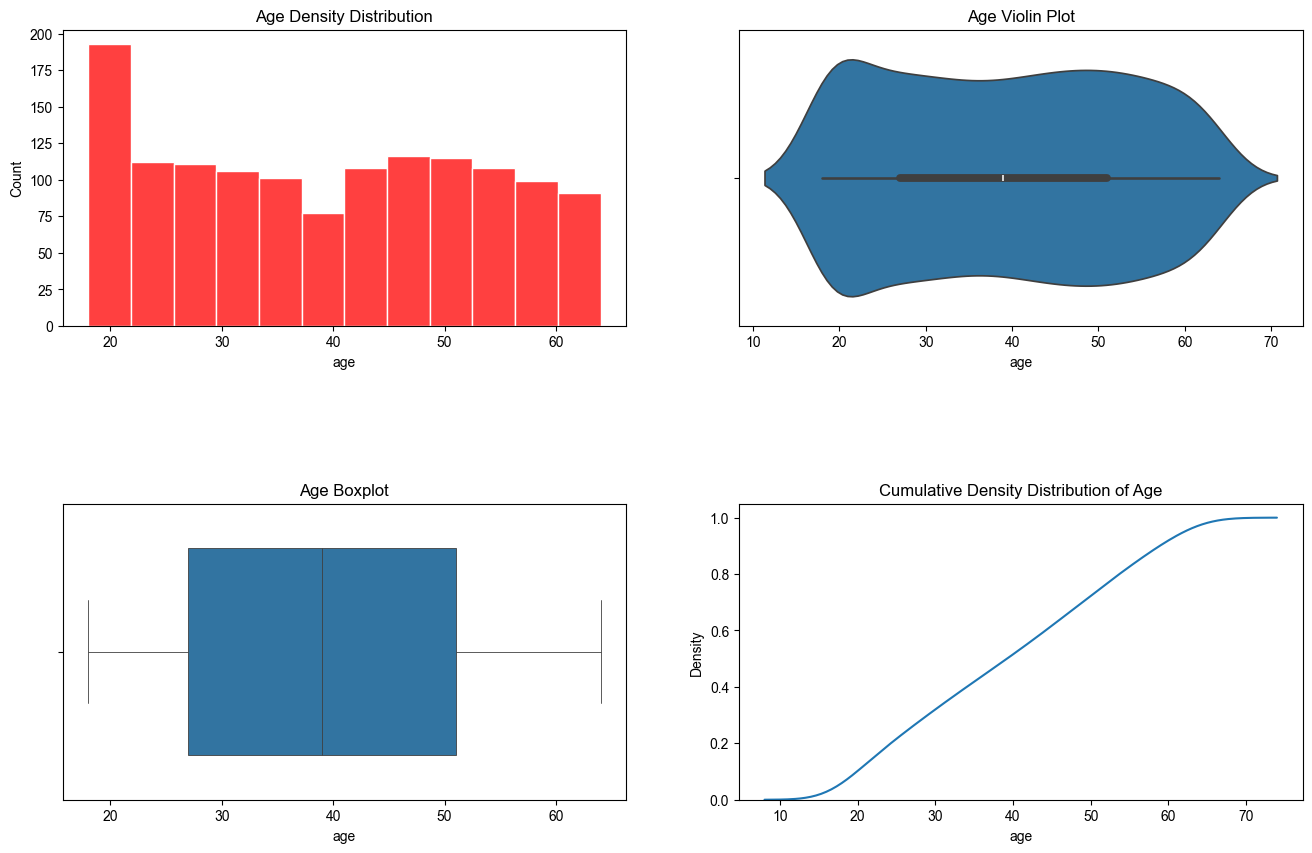

In [15]:
summary('age')

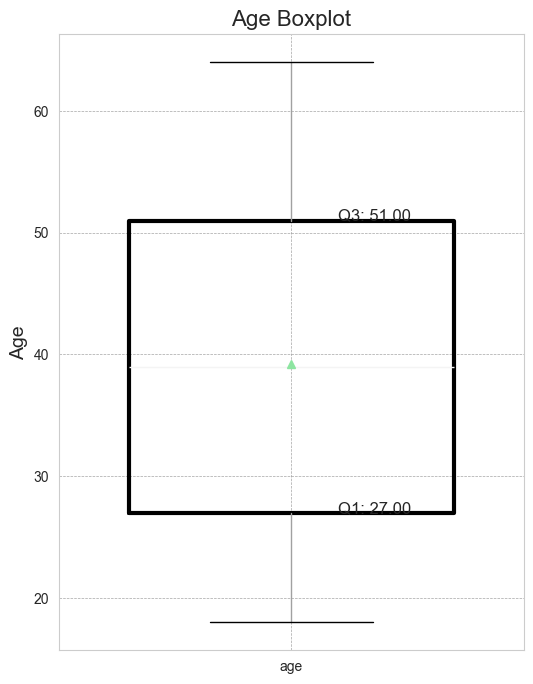

Mean Age = 39.222139117427076
Median Age = 39.0
Skewness of age: 0.054780773126998195.
Total number of outliers in age distribution: 0


In [16]:
box_plot('age')

`age` Observations:

- There are no age outliers in the dataset. 
- The ages of the insured are distributed almost evenly between 18 and 64. 
- The insured indidviduals have an average and median age of ~39 years old. The youngest insured individual is 18 and the oldest is 64

<h4>Body Mass Index (BMI):</h4>


Variable is bmi
Min value: 15.96
Max value: 53.13
Q1 -> 26.29 Q2 -> 30.4 Q3 -> 34.7


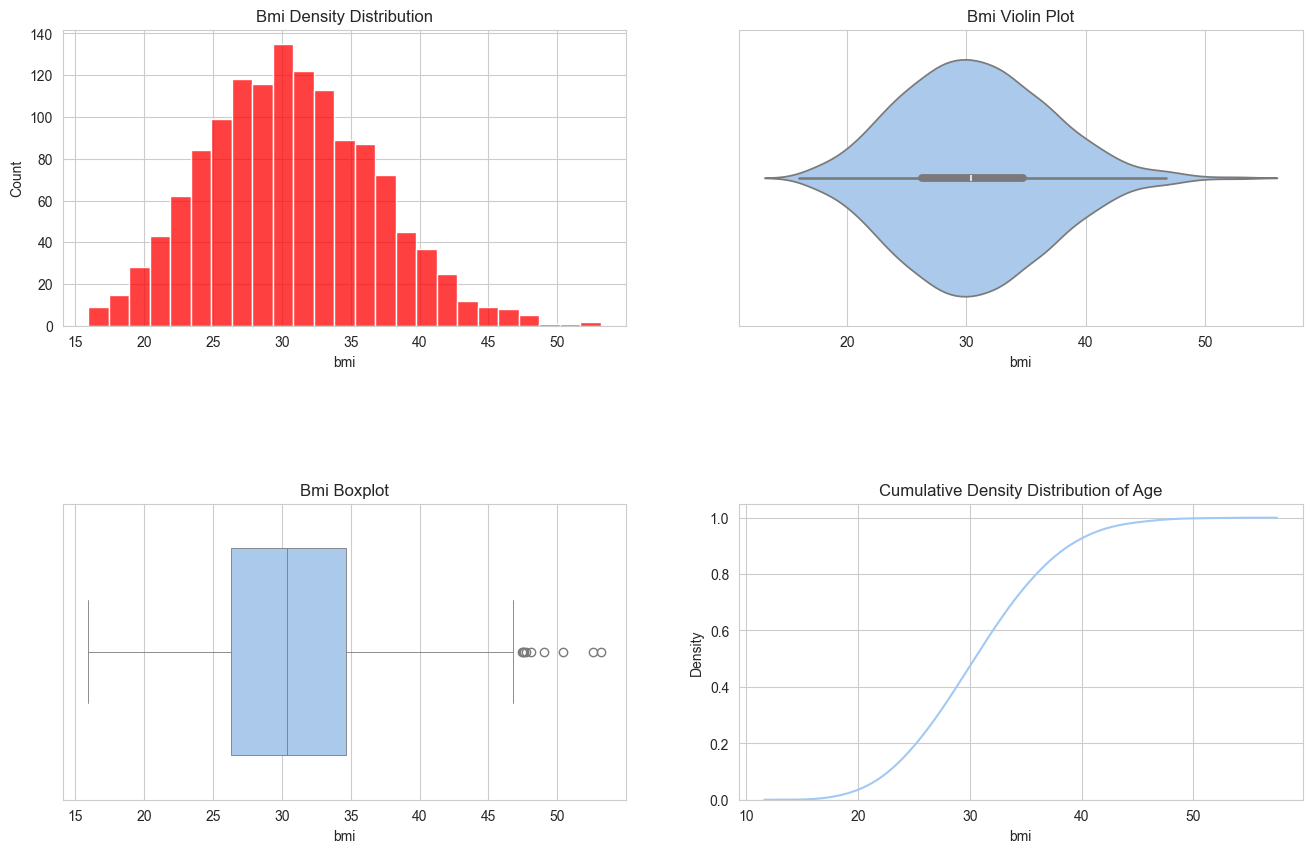

In [17]:
summary('bmi')

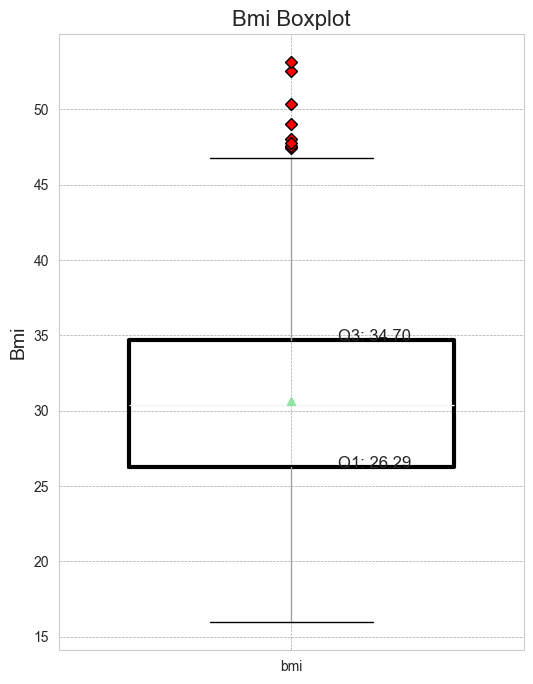

Mean Bmi = 30.66345175766642
Median Bmi = 30.4
Skewness of bmi: 0.28391419385321137.
Total number of outliers in bmi distribution: 9


In [18]:
box_plot('bmi')

In [19]:
# Selecting specific columns
selected_data = df[['age', 'sex', 'charges']]

# Filtering df based on certain conditions
smokers = df[df['smoker'] == 'yes']

# Creating a new column for BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

df


,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [20]:
# Who has the highest BMI?

df[df['bmi'] == df['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges,bmi_category
1317,18,male,53.13,0,no,southeast,1163.4627,Obese


In [21]:
#Who had the lowest BMI?
df[df['bmi'] == df['bmi'].min()]

,age,sex,bmi,children,smoker,region,charges,bmi_category
172,18,male,15.96,0,no,northeast,1694.7964,Underweight


In [22]:
#How are the charges distributed?
print(df['charges'].mean(), df['charges'].median())

13279.121486655948 9386.1613


`bmi` Observations:
- There are 9 outliers in the BMI data. The BMI has a skewness of 0.2 suggesting that the data is fairly symetrical. The number of outliers is inconsequential to the overall shape and representation of the data.

- The mean and median of the BMI data are 30.66 nd 30.4 respectfully, following a normal distribution. The BMI density distribution plot further reinforces this pattern, showing a bell shaped curve.

- The insured with the highest BMI (53.13) was charged 1163.4627. The average insurance charge in our data is 13279.121 while median charge is 9386.16. He pays 1163.46 charges which is less than the mean but significantly greater than the median.

- Interestingly, It appears that the individual with the lowest BMI (15), categorized as severely underweight as per WHO classification, is charged 1694.79. This charge is less than the mean insurance cost, indicating a lower expense than average. However, it's worth noting that this discrepancy might stem from health risk considerations associated with being severely underweight.

- This supports the hypothesis that extreme BMI values, whether high or low, seem to correlate with higher insurance charges. This aligns with the idea that health attributes indicating potential health risks, like significantly high or low BMI, may indeed lead to increased insurance premiums.

- In a broader sense, extreme values or outliers in the data can significantly impact the mean, making it higher than the median, which is less sensitive to extreme values

`charges`


Variable is charges
Min value: 1121.8739
Max value: 63770.42801
Q1 -> 4746.344 Q2 -> 9386.1613 Q3 -> 16657.71745


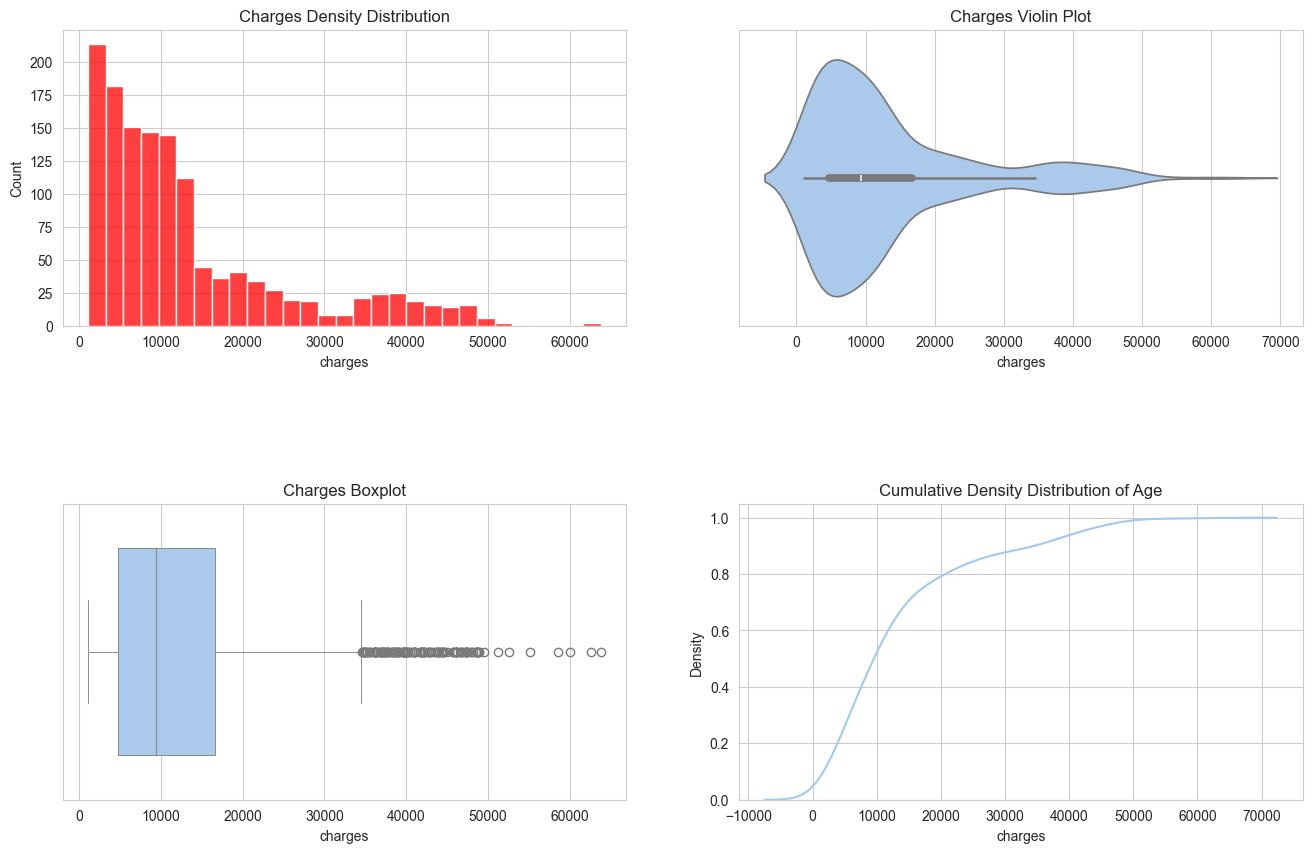

In [23]:
summary('charges')

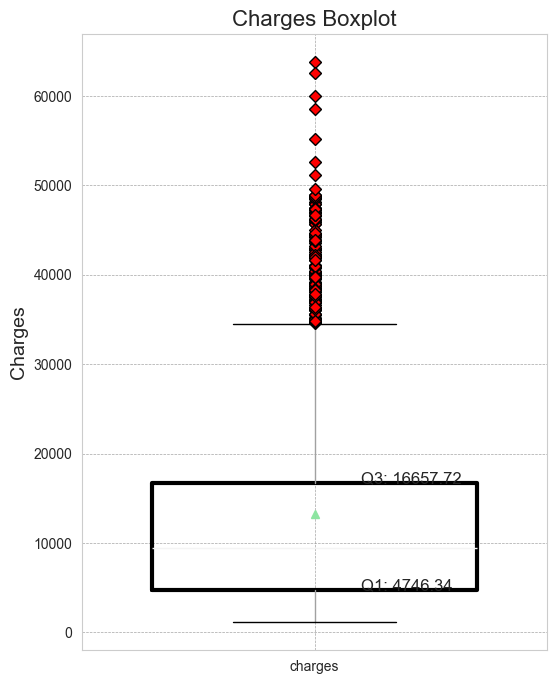

Mean Charges = 13279.121486655948
Median Charges = 9386.1613
Skewness of charges: 1.5153909108403483.
Total number of outliers in charges distribution: 139


In [24]:
box_plot('charges')

In [25]:
#Who had the highest charges
df[df['charges'] == df['charges'].max()]

,age,sex,bmi,children,smoker,region,charges,bmi_category
543,54,female,47.41,0,yes,southeast,63770.42801,Obese


`age` Observation:
- The charges data is heavily skewed to the left. The skeweness is 1.5 suggesting the graph has many outliers. Most of the charges are within a certain range.
- The median (9386.1613) is less than the mean (13279.121) and the highest and lowest charges are 1121.8739 and 63770.42801 respectfully.
- The highest premium charge is 63770, a 54 year old smoker who is Obese(High BMI). This person is one of the extreme outliers which skews the data to the left.
- The insured with the highest BMI is charged 1163.4627 which is less than the average charge. Despite also being obese like the insured who was charged highest, this indivial's profile is completely different. He is younger and a non-smoker. 
- This is in line with our basic understanding that health attributes indicating potential health risks like smoking and old age.

<h4>Summary and Distribution of Categorical Variables</h4>

Lets create bar charts to visualize the categorical variables 

In [26]:
#Helper Functions

def pie_chart(x='smoker'):
    fig, ax = plt.subplots(1, figsize=(6, 8))
    s = df.groupby(x).size()
    my_values = s.values.tolist()
    my_indexes = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)
    wedges, texts, autotexts = ax.pie(my_values, autopct=lambda pct: func(pct, my_values), textprops=dict(color='w'))
    ax.legend(wedges, my_indexes, 
                title= 'Index',
                loc= 'center left',
                bbox_to_anchor = (1, 0, 0.5, 1))
    
    plt.setp(autotexts, size=12, weight="bold")
    ax.set_title(f'{x.capitalize()} Pie Chart')
    plt.show()

`sex` and `smoker`

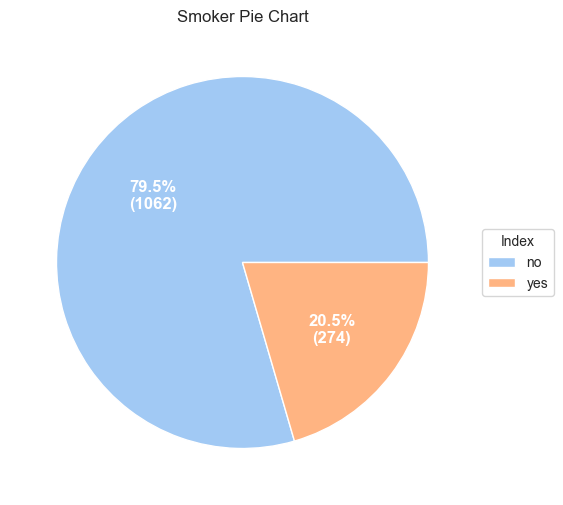

In [27]:
pie_chart()

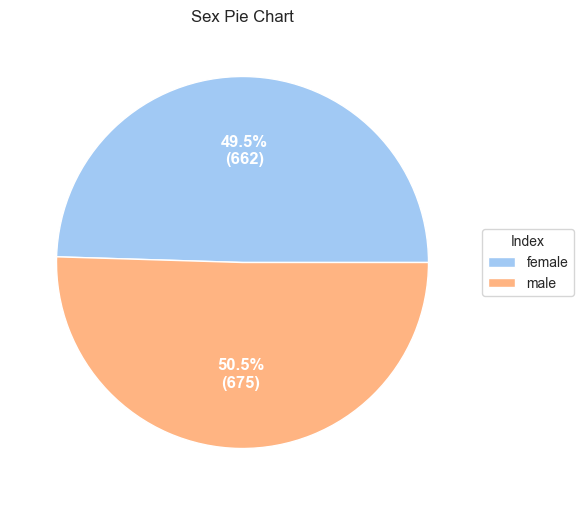

In [28]:
pie_chart('sex')


Smokers account for 20.5% of all of the insured and the sex variable is almost evenly distributed among males and femailes. Lets compare smoking habits of both genders in this dataset.

<Axes: xlabel='smoker', ylabel='count'>

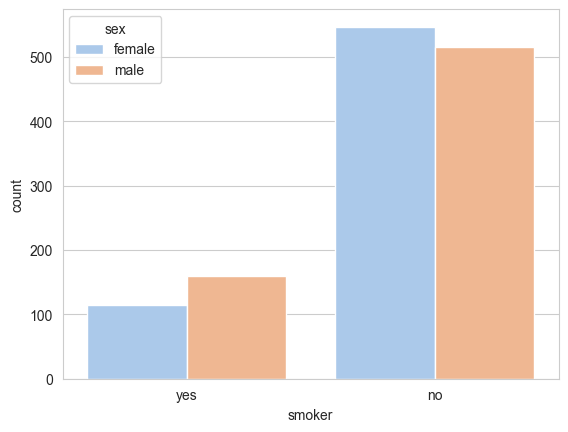

In [29]:

sns.countplot(x = 'smoker', hue = 'sex', data = df)

How do the charges of smokers differ by gender?

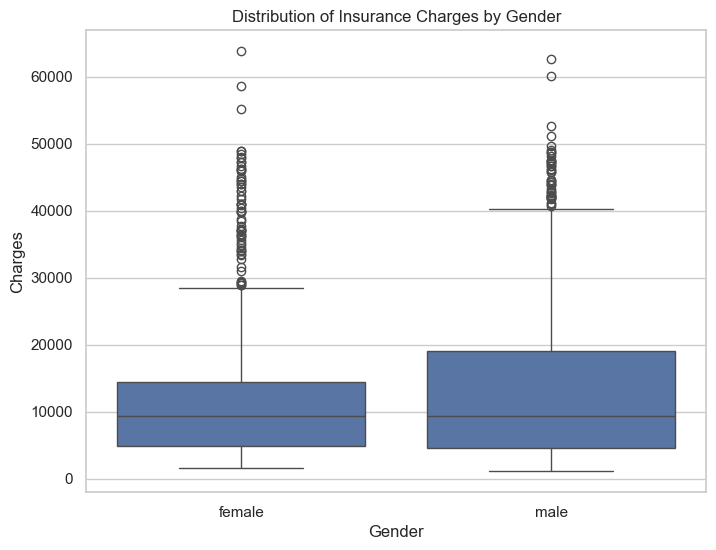

In [30]:
# Comparing charges between genders
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='sex', y='charges', data=df)
plt.title('Distribution of Insurance Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

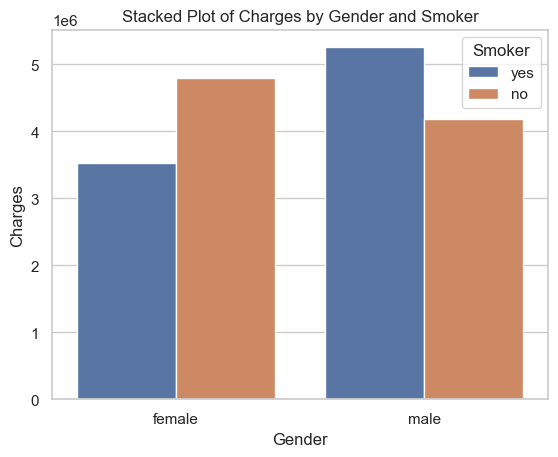

In [31]:
sns.barplot(x='sex', y='charges', hue='smoker', data=df, estimator=sum, errorbar=None)
plt.title('Stacked Plot of Charges by Gender and Smoker')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper right')
plt.show()

Before we proceed, lets answer a few questions:

Q1. Is there any correlation between smoking habits and premium charges?

Q2. Do the charges vary across diffent regions?

Q3. Are the insured with more children charged higher?



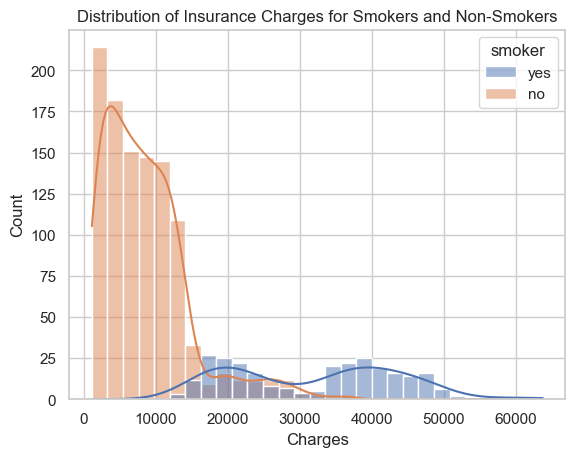

In [32]:
# Distribution of charges for smokers and non-smokers
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.xlabel('Charges')
plt.title('Distribution of Insurance Charges for Smokers and Non-Smokers')
plt.show()


In [33]:
# Average charges for smokers and non smokers 
avg_charges_smokers = df[df['smoker'] == 'yes']['charges'].mean()
avg_charges_non_smokers = df[df['smoker'] == 'no']['charges'].mean()

print(f" Non smokers are charged approx. {round(avg_charges_non_smokers)} on average while smokers are charged approx. {round(avg_charges_smokers)} on average!")

 Non smokers are charged approx. 8441 on average while smokers are charged approx. 32050 on average!


`region`

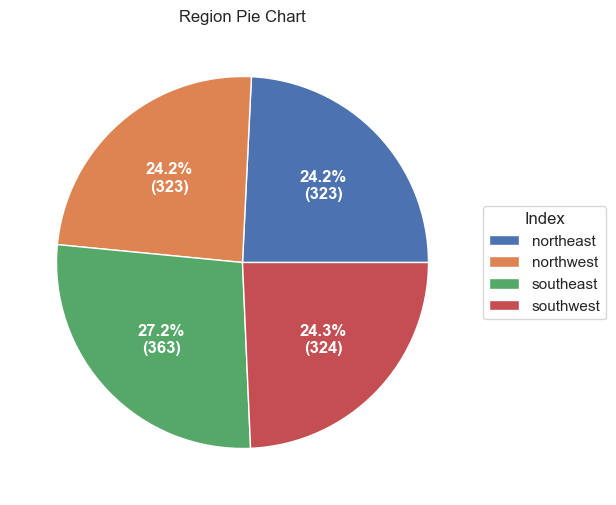

In [34]:
pie_chart('region')

`region` and `charges`

Q2: Do the charges vary across diffent regions?

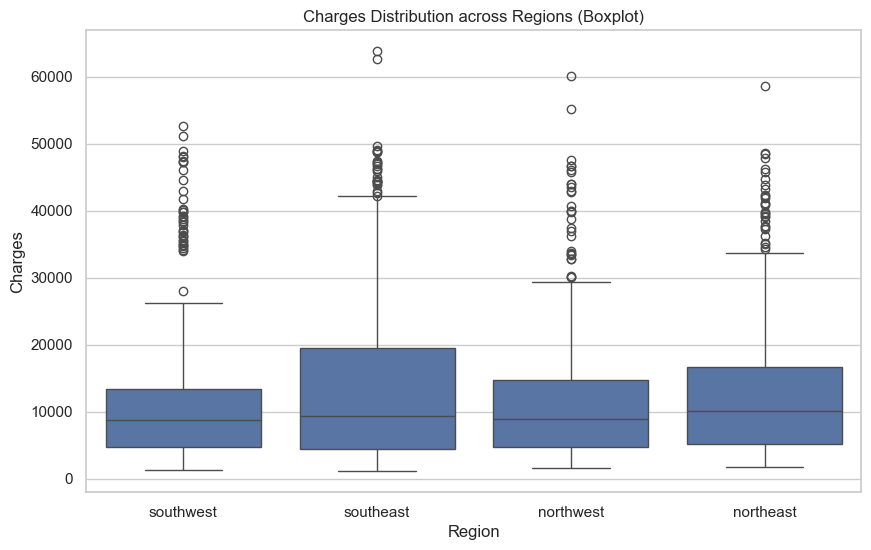

In [35]:
#How are the charges distributed across regions

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges Distribution across Regions (Boxplot)')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()



After comparing `region` and `charges` I observed:
- All the regions have a similar minimum value across different regions indicating a similar baseline charge across regions

- The presence of numerous outliers and the wide range between the minimum and maximum values suggest a skewed distribution

- The South East region having the highest outliers around $64,000 suggests that, in that region, there are cases significantly deviating from the typical charge. This might indicate unique or extreme medical cases, different insurance plans, or other factors impacting charges specifically in the South East

`children`


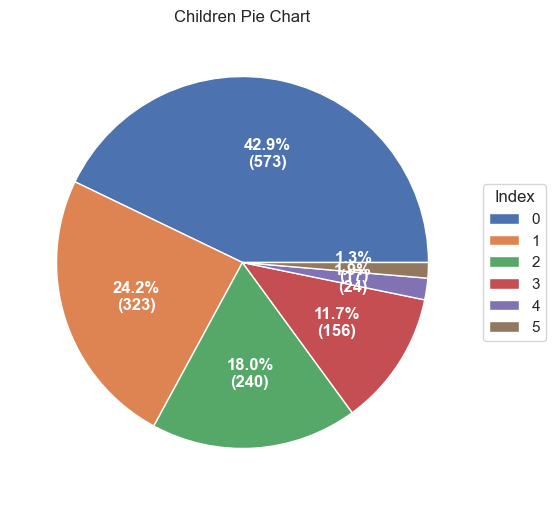

In [36]:
pie_chart('children')

`children` and `charges`

Q3: Are the insured with more children charged higher?

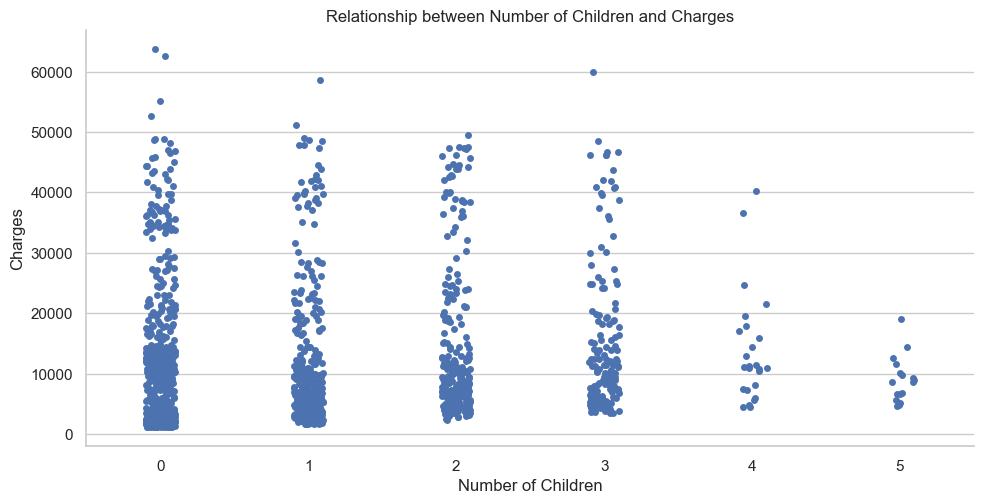

In [37]:
#Q3 Is there a correlation between children and charges?
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your data
# Example: df = your_data_here

sns.set(style="whitegrid")

# Create separate plots for each category in 'children'
sns.catplot(x='children', y='charges', kind='strip', data=df, height=5, aspect=2)
plt.title('Relationship between Number of Children and Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


In [38]:
print(f"0:  \n{df[df['children'] == 0].min()}\n"
      f"1:  \n{df[df['children'] == 1].min()}\n"
      f"2:  \n{df[df['children'] == 2].min()}\n"
      f"3:  \n{df[df['children'] == 3].min()}\n"
      f"4:  \n{df[df['children'] == 1].min()}\n")


0:  
age                        18
sex                    female
bmi                     15.96
children                    0
smoker                     no
region              northeast
charges             1121.8739
bmi_category    Normal Weight
dtype: object
1:  
age                        18
sex                    female
bmi                    16.815
children                    1
smoker                     no
region              northeast
charges             1711.0268
bmi_category    Normal Weight
dtype: object
2:  
age                        18
sex                    female
bmi                    16.815
children                    2
smoker                     no
region              northeast
charges             2304.0022
bmi_category    Normal Weight
dtype: object
3:  
age                        18
sex                    female
bmi                    18.905
children                    3
smoker                     no
region              northeast
charges              3443.064
bmi_cate

After comparing `children` and `charges` I observed:
- There are more insured individuals with no children and a gradual decline in the number of insured individuals as the number of children increases

- There seems to be a general trend of decreasing maximum charges as the number of children increases. This trend could suggest various factors influencing healthcare expenses as family size grows

- While there's a decreasing trend, there's also variability within each group. For instance, the maximum charge for 3 children is higher than that for 2 children, contrary to the downward trend observed overall

- Insured with no kids have the lowest premium charges with of 1121.8739 

Correlation

<h3>Data Formatting</h3>
Now that we have a sense the nature of our data. We need to get it in the right format for 

In [39]:
for x in ['sex', 'children', 'smoker', 'region']:
    df[x] = df[x].astype('category')

df.dtypes 

age                int64
sex             category
bmi              float64
children        category
smoker          category
region          category
charges          float64
bmi_category      object
dtype: object

In [40]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [41]:
#df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
X = df.drop(columns=['charges', 'bmi_category'])

y = df['charges']



In [44]:

# Using Pandas get_dummies to one-hot encode categorical columns

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# drop_first=True drops the first category to avoid multicollinearity (for binary columns)

# Preview the encoded DataFrame
print(df_encoded.head())


   age     bmi children      charges   bmi_category  sex_male  smoker_yes  \
0   19  27.900        0  16884.92400     Overweight     False        True   
1   18  33.770        1   1725.55230          Obese      True       False   
2   28  33.000        3   4449.46200          Obese      True       False   
3   33  22.705        0  21984.47061  Normal Weight      True       False   
4   32  28.880        0   3866.85520     Overweight      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [46]:
# Assuming 'df' contains the added columns like 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'

# Convert 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest' columns to 0 and 1
df_encoded['sex_male'] = df_encoded['sex_male'].apply(lambda x: 1 if x == True else 0)
df_encoded['smoker_yes'] = df_encoded['smoker_yes'].apply(lambda x: 1 if x == True else 0)
df_encoded['region_northwest'] = df_encoded['region_northwest'].apply(lambda x: 1 if x == True else 0)
df_encoded['region_southeast'] = df_encoded['region_southeast'].apply(lambda x: 1 if x == True else 0)
df_encoded['region_southwest'] = df_encoded['region_southwest'].apply(lambda x: 1 if x == True else 0)

# Display the modified DataFrame
print(df_encoded.head())


   age     bmi children      charges   bmi_category  sex_male  smoker_yes  \
0   19  27.900        0  16884.92400     Overweight         0           1   
1   18  33.770        1   1725.55230          Obese         1           0   
2   28  33.000        3   4449.46200          Obese         1           0   
3   33  22.705        0  21984.47061  Normal Weight         1           0   
4   32  28.880        0   3866.85520     Overweight         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


<Axes: >

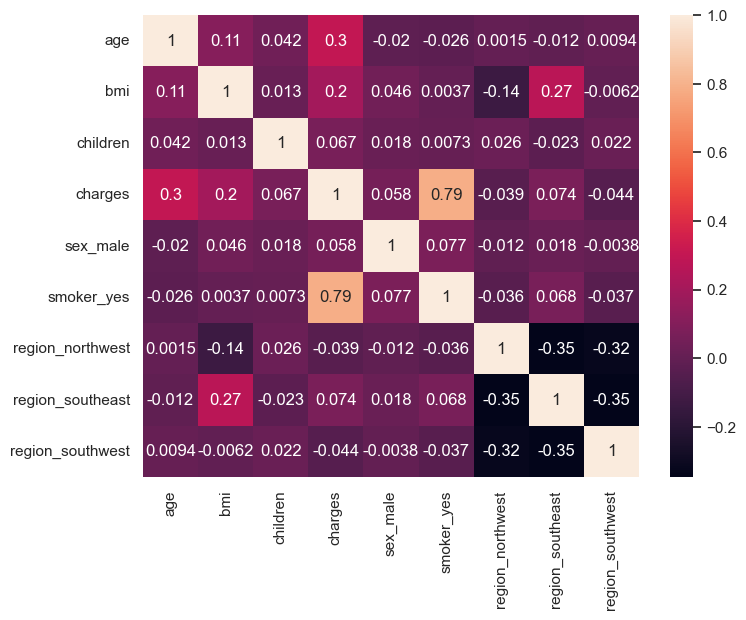

In [49]:
#df_encoded =df_encoded.drop(columns=['bmi_category'])
corr = df_encoded.corr()
fig = plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)

In [51]:
preped_data = df_encoded.to_csv("cleaned_data.csv")